In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
#read in file
df = pd.read_csv('/Users/samanthatraversi/Documents/diabetes.csv')
df.dataframeName = 'diabetes'

In [5]:
#inspect data frame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#remove unwanted columns
unwanted_columns = df.iloc[:, [6,7]].columns.to_list()
df = df.drop(unwanted_columns, axis=1)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,6,148,72,35,0,33.6,1
1,1,85,66,29,0,26.6,0
2,8,183,64,0,0,23.3,1
3,1,89,66,23,94,28.1,0
4,0,137,40,35,168,43.1,1


In [13]:
#replace null values with the mean value of the attribute for Glucose, BloodPressure, SkinThickness, Insulin, and BMI
df['Glucose'] = df['Glucose'].replace(0, 120)
df['BloodPressure'] = df['BloodPressure'].replace(0, 69)
df['SkinThickness'] = df['SkinThickness'].replace(0, 21)
df['Insulin'] = df['Insulin'].replace(0, 80)
df['BMI'] = df['BMI'].replace(0, 32)

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,6,148.0,72,35,80,33.6,1
1,1,85.0,66,29,80,26.6,0
2,8,183.0,64,21,80,23.3,1
3,1,89.0,66,23,94,28.1,0
4,0,137.0,40,35,168,43.1,1


<AxesSubplot:>

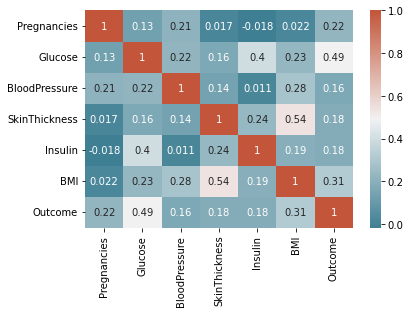

In [15]:
#View heatmap to see if there are correlations in the data
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [18]:
#Split dataframe into two: one for diabetic patients and one for non-diabetic patients
df.diabetic = df.loc[~((df['Outcome'] == 0))]

In [21]:
df.no = df.loc[~((df['Outcome'] == 1))]

In [22]:
df.diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,6,148.0,72,35,80,33.6,1
2,8,183.0,64,21,80,23.3,1
4,0,137.0,40,35,168,43.1,1
6,3,78.0,50,32,88,31.0,1
8,2,197.0,70,45,543,30.5,1


In [23]:
df.no.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
1,1,85.0,66,29,80,26.6,0
3,1,89.0,66,23,94,28.1,0
5,5,116.0,74,21,80,25.6,0
7,10,115.0,69,21,80,35.3,0
10,4,110.0,92,21,80,37.6,0


<AxesSubplot:xlabel='Pregnancies'>

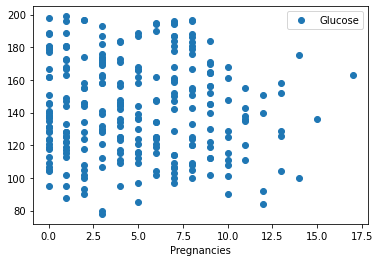

In [25]:
#Inspect whether number of pregnancies leads to increased risk level for health factors linked to diabetes
#starting with diabetic patients
df.diabetic.plot(x='Pregnancies', y='Glucose', style='o')

<AxesSubplot:xlabel='Pregnancies'>

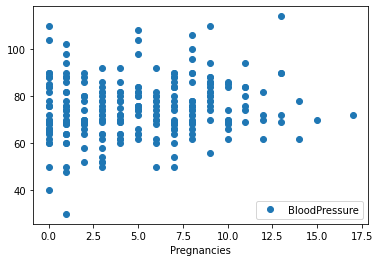

In [26]:
df.diabetic.plot(x='Pregnancies', y='BloodPressure', style='o')

<AxesSubplot:xlabel='Pregnancies'>

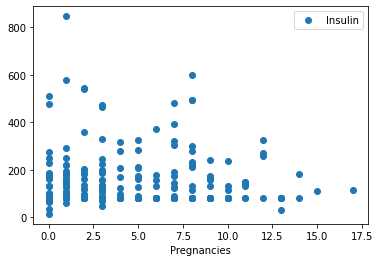

In [27]:
df.diabetic.plot(x='Pregnancies', y='Insulin', style='o')

<AxesSubplot:xlabel='Pregnancies'>

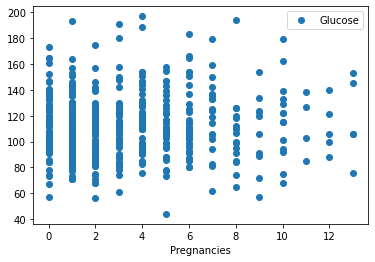

In [28]:
#Now to inspect the health factors with non-diabetic patients
df.no.plot(x='Pregnancies', y='Glucose', style='o')

<AxesSubplot:xlabel='Pregnancies'>

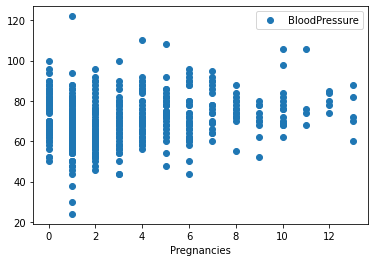

In [29]:
df.no.plot(x='Pregnancies', y='BloodPressure', style='o')

<AxesSubplot:xlabel='Pregnancies'>

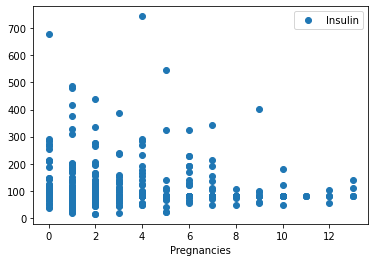

In [30]:
df.no.plot(x='Pregnancies', y='Insulin', style='o')

<AxesSubplot:>

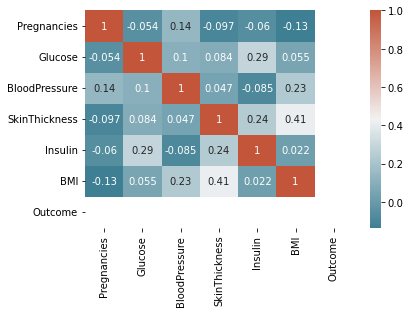

In [31]:
#Heatmap of all variables for diabetic patients only
corr = df.diabetic.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:>

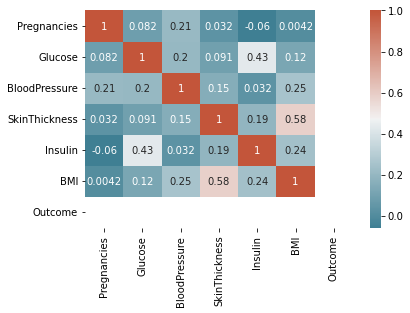

In [32]:
#Heatmap of all variables for non-diabetic patients only
corr = df.no.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))